# Face detection in OpenCV using *Haar cascade*

A *Haar Cascade* is a cascade-function based classifier which is used to detect the object for which it has been trained for, from source.

The Haar Cascade is trained by superimposing a 'positive' image over a set of 'negative' images. The training is generally done on a server and on various stages.

We're using the Haar cascade in this notebook to detect faces and facial features. Hence, this means that the algorithm is trained on a lot of positive images (images of faces) and negative images (images without faces). 

We'll be using the func **cv2.CascadeClassifier()** to read the Cascade. 

In [3]:
import cv2
import numpy as np
import time

path1 = ""

t1 = time.time()
# Reading xml files of face and eye
face_cascade = cv2.CascadeClassifier(path1 + 'haarcascade_frontalface_default.xml')

eye_cascade = cv2.CascadeClassifier(path1 + 'haarcascade_eye.xml')

time.time() - t1

0.044352054595947266

**Note** : Here we use **face_cascade.detectMultiScale()** for face detection. And **eye_cascade.detectMultipleScale()** for eye detection.

So what are these cascades anyway? 

Even for small images, the number of extract-able features is very large. To reduce processing burden, Paul Viola and Michael Jones in their landmark 2001 paper, “Rapid Object Detection using a Boosted Cascade of Simple Features” proposed a *cascade of classifiers* that would in parallel evaluate features and strightaway drop anything that didn't contain any facial feature. This vastly reduced processing requirements and time.

For making rectangle around the object, we use **cv2.rectangle(img, (x+y), (x+w, y+h), (255,0,0), 2)**

where x=length , w as width ,y= breadth , h as height, and 2 represents a 2D rectangle.

Now, time to load images of people's faces and see how well our classifier performs.

I've put some images on LMS, will use them for this notebook. One is of Sachin Tendulkar and the other of Mahesh Babu.

BTW, one can just as well use your selfie camera, facetime camera or laptop camera for video feed and grab a frame from there.

P.S. For any processing below, we first convert the frames into gray-scale, then process, then convert back to color image.

Populating the interactive namespace from numpy and matplotlib


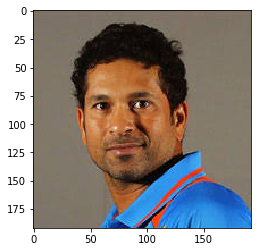

In [4]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

path2 = "./"
img = cv2.imread(path2 + 'sachin.jpg')
# img = cv2.imread(path2 + 'mahesh_babu.jpg')

img_bgr = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # coz openCV default is BGR, not RGB
plt.imshow(img_bgr)

#### Displaying of the final image frames

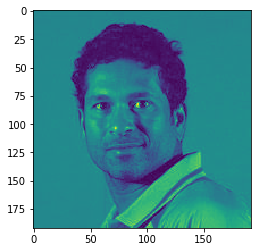

In [5]:
# Grayscale doesn't show up well on openCV somehow

img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray)

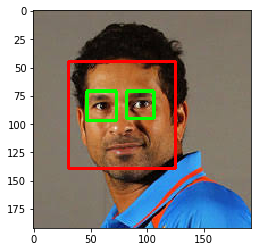

In [6]:
faces = face_cascade.detectMultiScale(img_gray, 1.3, 5)

for (x,y,w,h) in faces:
    img_bgr = cv2.rectangle(img_bgr,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = img_gray[y:y+h, x:x+w]
    roi_color = img_bgr[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.imshow(img_bgr)

Neat, eh? 

Let's try one female face this time. Check out kangana.jpg and run the same routine as above again.

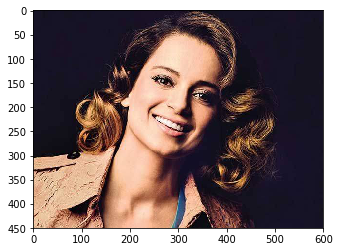

In [7]:
img = cv2.imread(path2 + 'kangana.jpg')
img_bgr = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # coz openCV default is BGR, not RGB
plt.imshow(img_bgr)

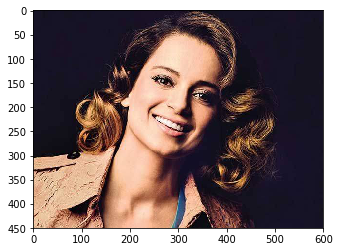

In [8]:
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(img_gray, 1.3, 5)
for (x,y,w,h) in faces:
    img_bgr = cv2.rectangle(img_bgr,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = img_gray[y:y+h, x:x+w]
    roi_color = img_bgr[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.imshow(img_bgr)

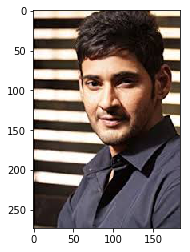

In [9]:
# make user defined function for above routine
def faceMarkup(img_bgr):
  img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
  # plt.imshow(img_gray)

  faces = face_cascade.detectMultiScale(img_gray, 1.3, 5)
  for (x,y,w,h) in faces:
      img_bgr = cv2.rectangle(img_bgr,(x,y),(x+w,y+h),(255,0,0),2)
      roi_gray = img_gray[y:y+h, x:x+w]
      roi_color = img_bgr[y:y+h, x:x+w]
      eyes = eye_cascade.detectMultiScale(roi_gray)
      for (ex,ey,ew,eh) in eyes:
          cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

  plt.imshow(img_bgr)

# test on a new image
img = cv2.imread(path2 + 'mahesh_babu.jpg')
img_bgr = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # coz openCV default is BGR, not RGB
plt.imshow(img_bgr)

0.0164639949798584

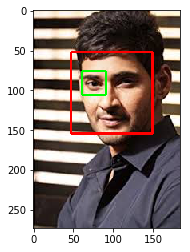

In [10]:
# detecting features for multiple individual faces
t1=time.time()

faceMarkup(img_bgr)    

time.time() - t1

Easy, eh? The wonders a trained model can do, in this instance - Haar Cascade. Reg further explorations and possibilities, a ton of Qs arise. 

Suppose I ask you to take a group-selfie on your mobile and run face detection, how might that work? Could we ID particular faces across images? And howmight we do that? What particular feature set uniquely defines and identifies an individuals' face? 

And so on. I'll however stop here. Many of the Qs above need more math modeling and D/L M/L methods to approach them with.

Ciao

Sudhir